In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math

# Análisis de los resultados de la query seleccionada
Se ha seleccionado como query objetivo para esta parte del trabajo, la que nos muestra el número total de pedidos y el importe de todos ellos de cada cliente regsitrado en la base de datos. A lo largo de este notebook se harán distintos análisis respecto a los resultados extraídos.

In [8]:
# Descripcion de datos
data = pd.read_csv("total_vendido.csv")
data

,id_pedido,nombre,apellido,total_pedido,numero_pedidos
0,18,Katie,Blanchard,8467.60,3
1,6,Scott,Obrien,7273.52,3
2,15,Autumn,Anderson,6356.06,1
3,4,Sean,Franklin,6323.70,4
4,7,Scott,Obrien,6256.15,3
5,9,Sean,Franklin,6177.37,4
6,13,Janice,Chavez,5908.48,2
7,22,Sara,Fry,5551.44,3
8,1,Tim,Byrd,5501.30,1
9,28,William,Jones,4703.52,1


## Análisis Descriptivo
En el siguiente análisis, vamos a describir lo que tenemos en el resultado de la query que hemos exportado.

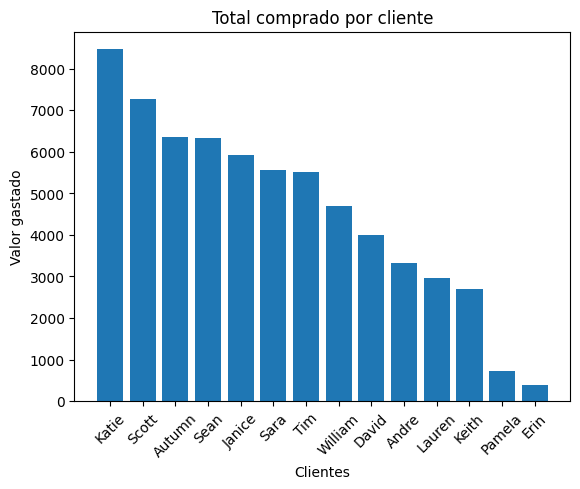

In [ ]:
# Descripcion de datos
plt.title("Total comprado por cliente")
plt.bar(data["nombre"], data["total_pedido"])
plt.xticks(rotation=45)
plt.xlabel("Clientes")
plt.ylabel("Valor gastado")
plt.show()

**Descripción:** Se observa la distribución de los distintos clientes y sus gastos totales en productos del supermercado. Vemos que no están todos los clientes, por lo que podemos afirmar que existen usuarios registrados que aún no han realizados ninguna compra en el supermercado. En la gráfica anterior, solo observamos un 70% (14/20) de usuarios que han comprado productos.

Por otro lado, podemos sacar la conclusión de que Katie es la mejor cliente que tenemos en disposición y que Erin es el cliente con menos monto total gastado hasta el momento. Entre ellos se distrbuye de manera casi lineal el resto de clientes registrados, ciertamente entre Keith y Pamela existe una brecha relativamente notable en comparación a otras diferencias.

## Análisis Diagnóstico
Realizamos un diagnóstico para tratar de entender las relaciones entre variables y como pueden afectar etre ellas.

correlation: 0.13488896592725313


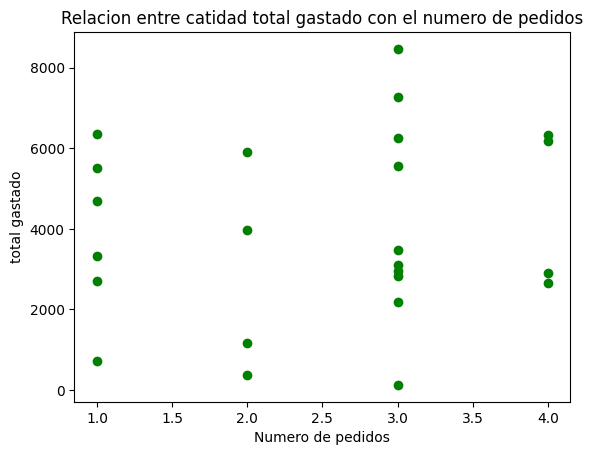

In [ ]:
# Diagnostico de datos
# Relacion entre numeros de pedidos y precio
correlation = data["total_pedido"].corr(data["numero_pedidos"])
print(f"correlation: {correlation}")

plt.scatter(data["numero_pedidos"],data["total_pedido"], color='green')
plt.title("Relacion entre catidad total gastado con el numero de pedidos")
plt.ylabel("total gastado")
plt.xlabel("Numero de pedidos")
plt.show()

**Explicación:** Tenemos una imagen donde relacionamos el nº de pedidos con el importe total gastado en los clientes. Se observa que se concentran ligeramente más en la cantidad de 3 pedidos y el resto son similares. El valor de la correlación nos indica que estas dos variables no tienen redundancia ya que varias compras no indica siempre un mayor gasto y pocas compras tampoco indica un importe superior.

## Análisis predictivo
En este apartado intetaremos "predecir" en la medida de lo posible mediante nuestro análisis de datos usando la Regresión Lineal.

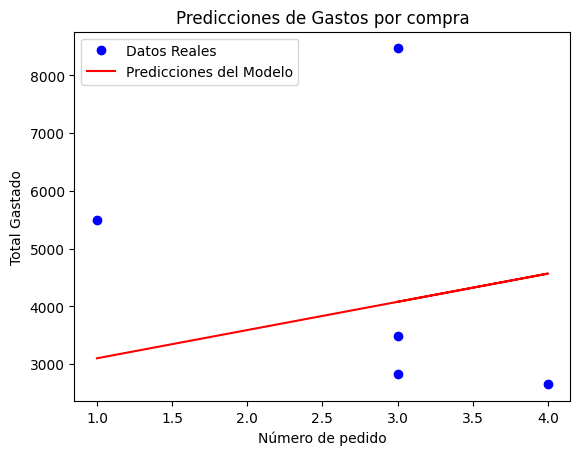

In [ ]:
# Analisis predictivo
X_train, X_test, y_train, y_test = train_test_split(data[["numero_pedidos"]], data["total_pedido"], test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

plt.plot(X_test,y_test,"bo",label="Datos Reales")
plt.plot(X_test,predicciones,'r-', label="Predicciones del Modelo")
plt.title("Predicciones de Gastos por compra")
plt.xlabel("Número de pedido")
plt.ylabel("Total Gastado")
plt.legend()
plt.show()

In [ ]:
# Coeficiente y ordenada al origen de nuestro modelo
a = modelo.coef_[0]
b = modelo.intercept_

# Objetivo de gasto
total_objetivo = 5000

# Número de pedidos necesarios
pedidos_necesarios = (total_objetivo - b) / a
pedidos_necesarios_ceil = math.ceil(pedidos_necesarios)
print(f"Para gastar al menos {total_objetivo}, el cliente debería hacer {pedidos_necesarios:.2f} pedidos")

Para gastar al menos 5000, el cliente debería hacer 4.89 pedidos


Aquí fijamos como objetivo la meta de que los clientes logren acumular un importe total de 5000 unidad monetaria. Luego para ello hemos recurrido a la Regresión Lineal con una distribución 80/20 en Train y Test. Con un modelo predictivo obtenido, nos indica que los cliente deberán promediar un total de 4.89 pedidos para lograr el objetivo de 5000 unidades monetarias en gastos totales en pedidos del supermercado.

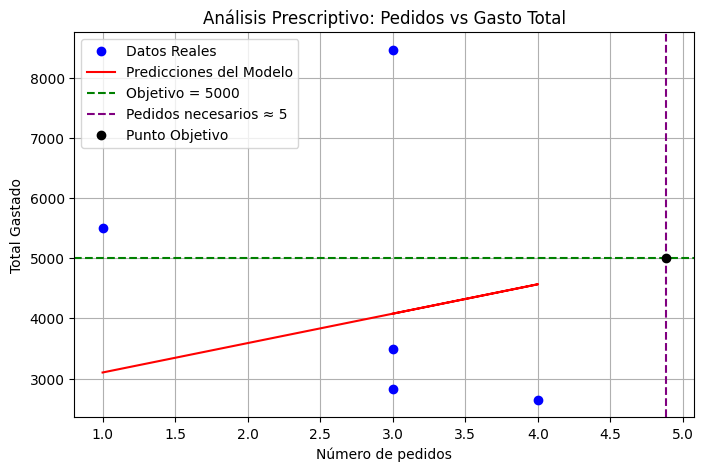

In [ ]:
# Graficar datos reales y predicciones
plt.figure(figsize=(8,5))
plt.plot(X_test, y_test, "bo", label="Datos Reales")
plt.plot(X_test, predicciones, 'r-', label="Predicciones del Modelo")

# Graficar línea horizontal del objetivo
plt.axhline(y=total_objetivo, color='green', linestyle='--', label=f'Objetivo = {total_objetivo}')

# Graficar línea vertical del número de pedidos necesario
plt.axvline(x=pedidos_necesarios, color='purple', linestyle='--', label=f'Pedidos necesarios ≈ {pedidos_necesarios_ceil}')

# Marcar el punto de intersección
plt.plot(pedidos_necesarios, total_objetivo, 'ko', label='Punto Objetivo')

# Etiquetas y título
plt.title("Análisis Prescriptivo: Pedidos vs Gasto Total")
plt.xlabel("Número de pedidos")
plt.ylabel("Total Gastado")
plt.legend()
plt.grid(True)
plt.show()